**CodSoft Data Science Internship – TASK 1: TITANIC SURVIVAL PREDICTION**

**Problem Statement Task 01 | TITANIC SURVIVAL PREDICTION**

**Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.**

**The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.**

**Importing all the necessary libraries**

In [1]:
# Import libraries needed for data processing and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing tools for preparing and splitting the data
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler      # To scale features to a standard range

# Machine learning model and performance metric
from sklearn.linear_model import LogisticRegression   # Classification model for predicting binary outcomes
from sklearn.metrics import accuracy_score            # To check how accurate the model’s predictions are


**Load data from the Titanic CSV file**

In [2]:
# Load the Titanic dataset from CSV format
dataset = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# View the top rows of the Titanic data
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display the last few entries of the dataset
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Find out how many rows and columns are in the dataset
dataset.shape

(891, 12)

In [6]:
# Get an overview of data types and non-missing values in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Show the names of all columns in the dataset
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# View statistical details like mean, count, std, etc., for numeric columns
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Count missing or null values in each column
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Display the index range used by the dataset
dataset.index

RangeIndex(start=0, stop=891, step=1)

**Exploring and Analyzing the Dataset**

**create a plot comparing survivors and non-survivors**

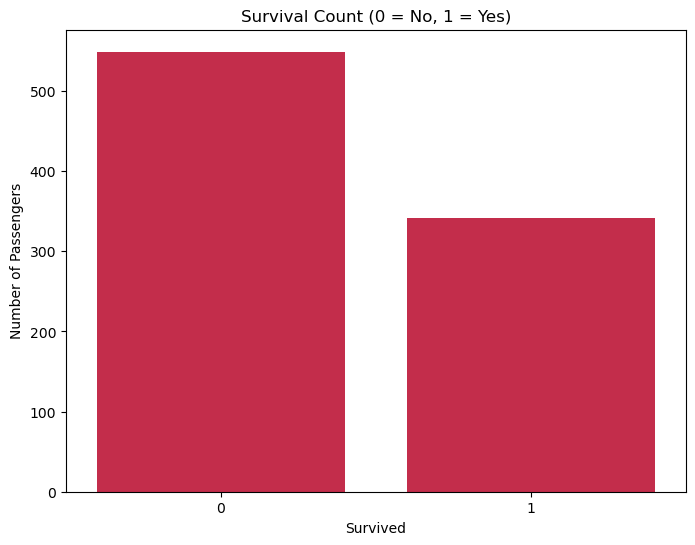

In [12]:
# Plot survival count with manual bar colors (no future warning)
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=dataset, color='crimson')  # use 'color' instead of 'palette'

plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()


**Distribution of Ages Among Passengers**

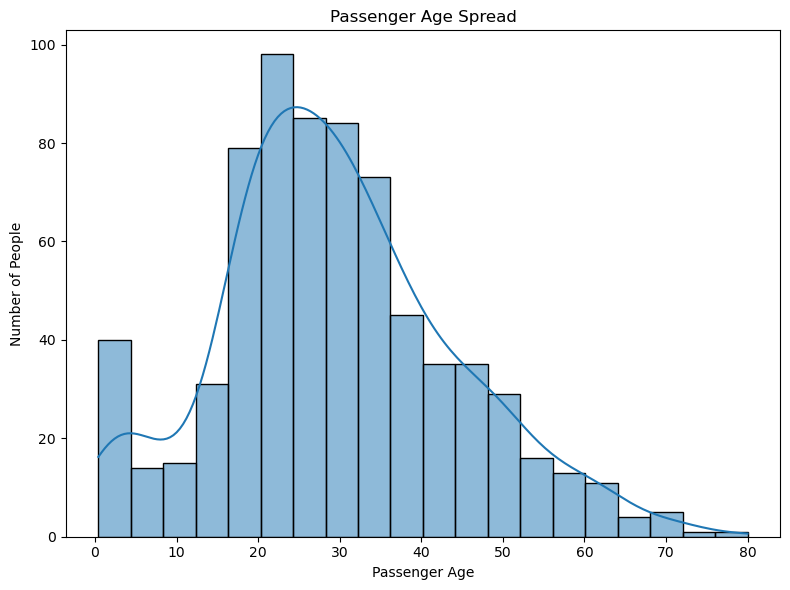

In [13]:
# Analyzing the Age Variation in the Dataset
plt.figure(figsize=(8, 6))  # Set the chart size

# Create a histogram with a smooth curve
sns.histplot(dataset['Age'], bins=20, kde=True)

# Add a title and axis labels
plt.title('Passenger Age Spread')
plt.xlabel('Passenger Age')
plt.ylabel('Number of People')

# Show the final plot
plt.tight_layout()
plt.show()

**Comparison of Survival Based on Gender**

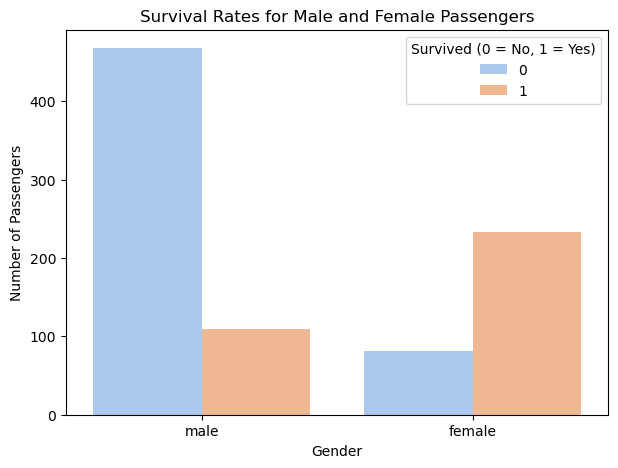

In [14]:
# Compare survival numbers between males and females
plt.figure(figsize=(7, 5))

# Count plot showing survival status split by gender
sns.countplot(x='Sex', hue='Survived', data=dataset, palette='pastel')

# Adding title and labels for clarity
plt.title('Survival Rates for Male and Female Passengers')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived (0 = No, 1 = Yes)')
plt.show()

**Distribution of Male and Female Travelers**

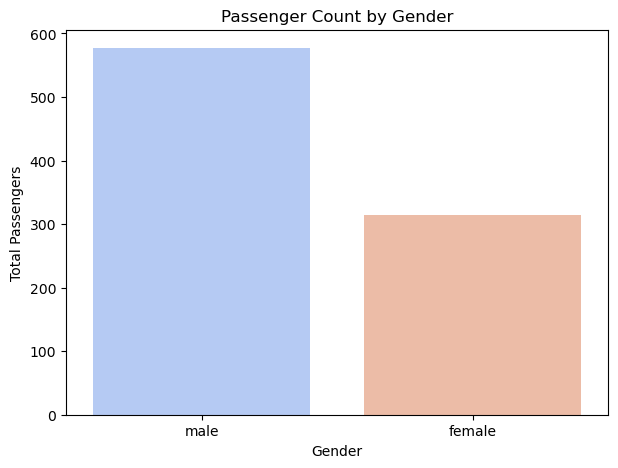

In [15]:
# Plot number of passengers by gender with color added safely
plt.figure(figsize=(7, 5))

# Using 'hue' same as 'x' and disabling legend to avoid future warning
sns.countplot(x='Sex', hue='Sex', data=dataset, palette='coolwarm', legend=False)

plt.title('Passenger Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Passengers')
plt.show()

**Age-wise Survival Comparison**

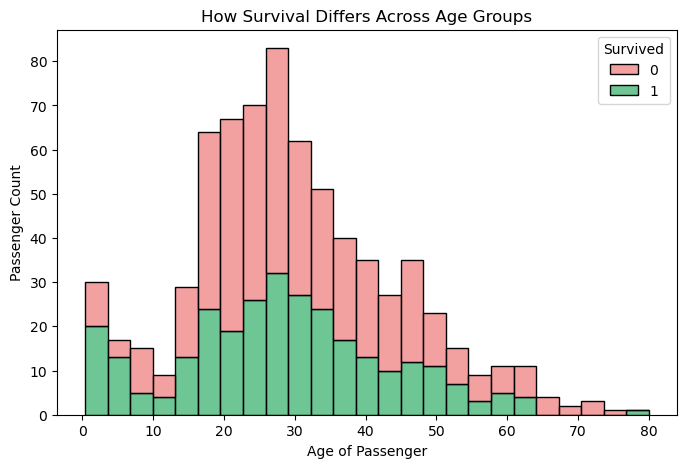

In [16]:
# Analyze how survival chances differ by passenger age
plt.figure(figsize=(8, 5))

# Plotting age distribution separately for survivors and non-survivors
sns.histplot(data=dataset, x='Age', hue='Survived', multiple='stack', bins=25, palette=['lightcoral', 'mediumseagreen'])

# Setting labels and title
plt.title('How Survival Differs Across Age Groups')
plt.xlabel('Age of Passenger')
plt.ylabel('Passenger Count')

plt.show()

**Distribution of Passenger Fare Prices**

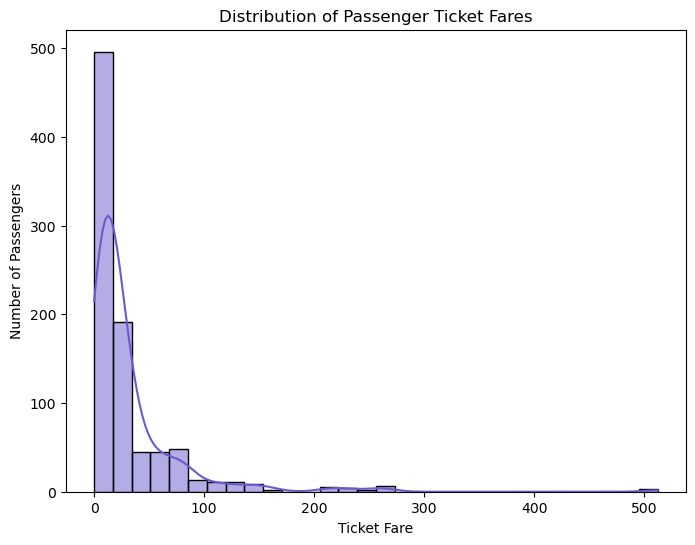

In [17]:
# Visualize how ticket fares are spread among passengers
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Fare'], bins=30, kde=True, color='slateblue')
plt.title('Distribution of Passenger Ticket Fares')
plt.xlabel('Ticket Fare')
plt.ylabel('Number of Passengers')
plt.show()

**Passenger count by ticket class**

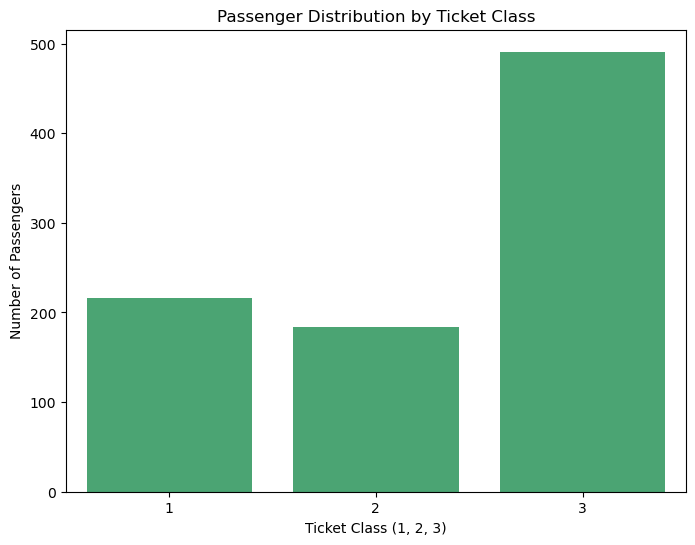

In [18]:
# Show how passengers are divided among ticket classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=dataset, color='mediumseagreen')
plt.title('Passenger Distribution by Ticket Class')
plt.xlabel('Ticket Class (1, 2, 3)')
plt.ylabel('Number of Passengers')
plt.show()

**Passenger Count by Port of Embarkation**

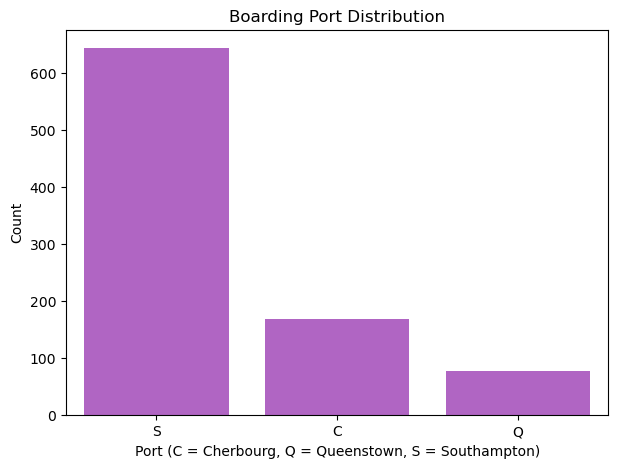

In [19]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Embarked', data=dataset, color='mediumorchid')
plt.title('Boarding Port Distribution')
plt.xlabel('Port (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Count')
plt.show()

**SCATTER PLOT**

**Scatter Plot of Age vs Fare with Gender Highlights**

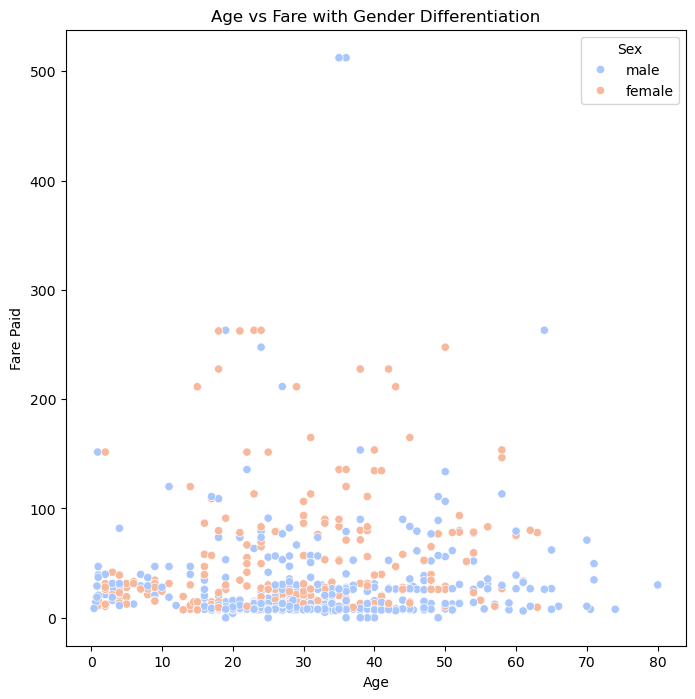

In [20]:
# Scatter plot showing the relationship between Age and Fare, colored by gender
plt.figure(figsize=(8, 8))
sns.scatterplot(data=dataset, x='Age', y='Fare', hue='Sex', palette='coolwarm')
plt.title('Age vs Fare with Gender Differentiation')
plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.show()

**LINE PLOT**

**Line Plot of Average Fare by Age**

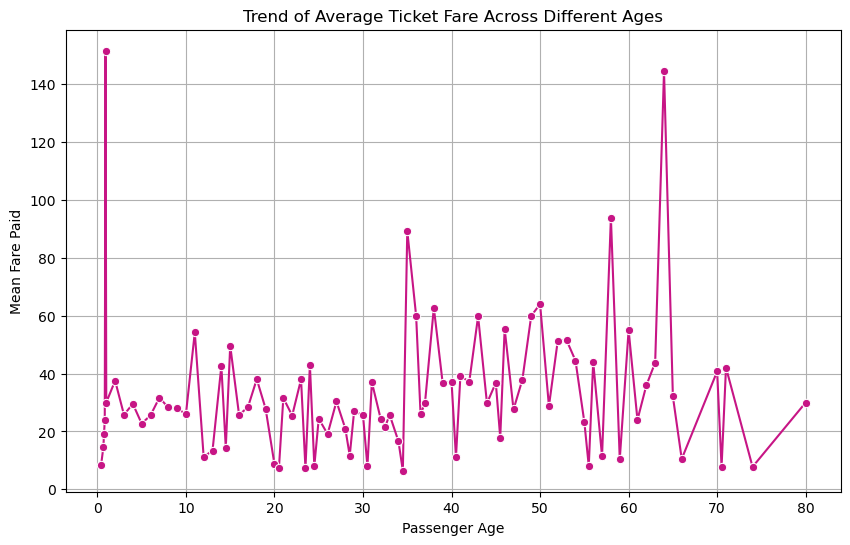

In [21]:
# Compute the mean fare for each passenger age and visualize the trend
average_fare_by_age = dataset.groupby('Age')['Fare'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Fare', data=average_fare_by_age, marker='o', color='mediumvioletred')

plt.title('Trend of Average Ticket Fare Across Different Ages')
plt.xlabel('Passenger Age')
plt.ylabel('Mean Fare Paid')
plt.grid(True)
plt.show()

**BOX PLOT**

**Class vs Age: Box Plot Analysis**

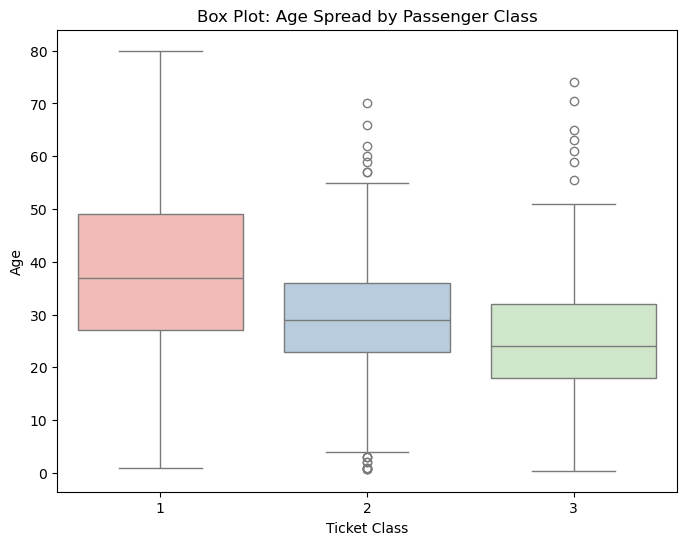

In [24]:
# Box Plot: Age Grouping Based on Travel Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Pclass', y='Age', hue='Pclass', palette='Pastel1', legend=False)
plt.title('Box Plot: Age Spread by Passenger Class')
plt.xlabel('Ticket Class')
plt.ylabel('Age')
plt.show()

**A few data points lie outside the normal range and outliers can be observed in the plot**

**RELATIONAL PLOT**

**Relational Plot Showing How Age and Fare Are Linked**

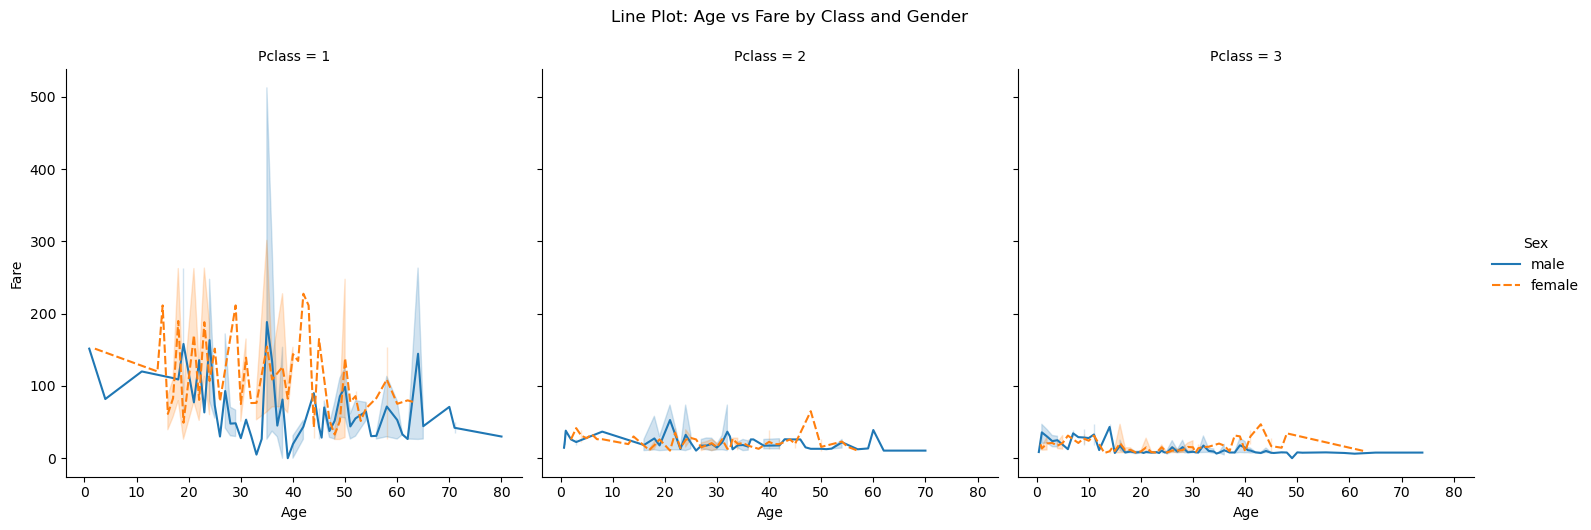

In [27]:
# Line relational plot: Fare vs Age split across classes and grouped by gender
sns.relplot(
    data=dataset,
    x="Age",
    y="Fare",
    col="Pclass",
    hue="Sex",
    style="Sex",
    kind="line",  # change to "scatter" for dot plot
    height=5,
    aspect=1
)
plt.suptitle("Line Plot: Age vs Fare by Class and Gender", y=1.05)
plt.show()

**PAIR PLOT**

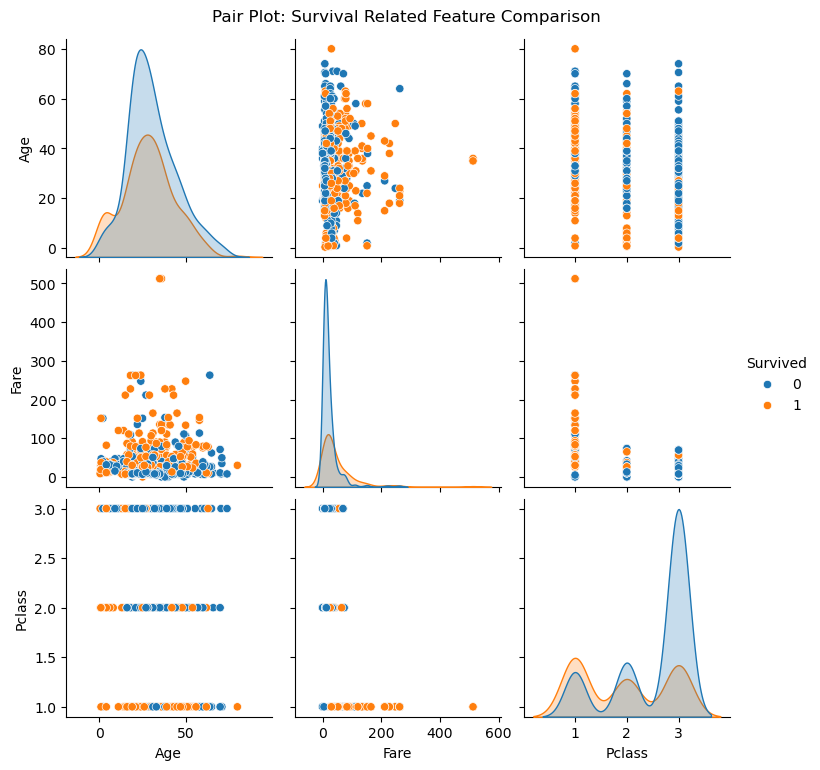

In [32]:
# Pair Plot Showing Distribution and Correlations
selected_data = dataset[['Survived', 'Age', 'Fare', 'Pclass']]
sns.pairplot(selected_data, hue='Survived')
plt.suptitle("Pair Plot: Survival Related Feature Comparison", y=1.02)
plt.show()

**HEATMAP**

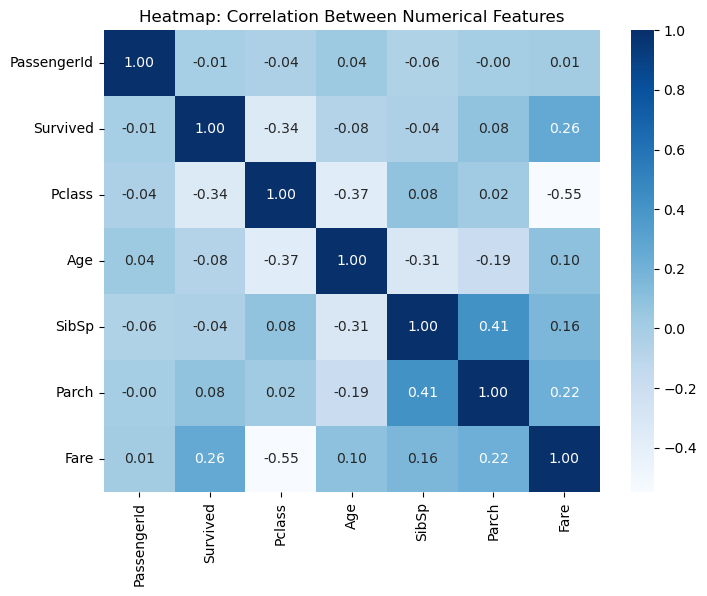

In [34]:
# Correlation Heatmap of Titanic Dataset Features
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap: Correlation Between Numerical Features')
plt.show()

**SWARM PLOT**

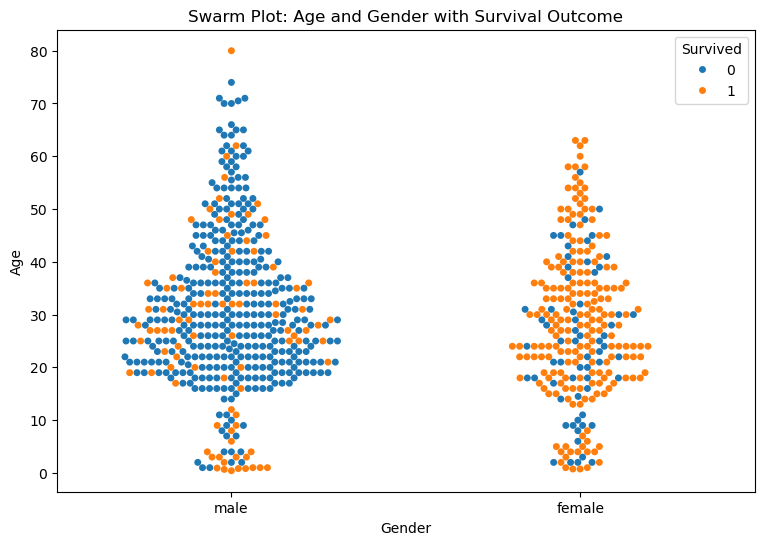

In [35]:
# Swarm Plot Showing Distribution of Data Points
plt.figure(figsize=(9, 6))
sns.swarmplot(x='Sex', y='Age', hue='Survived', data=dataset)
plt.title('Swarm Plot: Age and Gender with Survival Outcome')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

**Correlation Matrix Heatmap of Titanic Dataset**

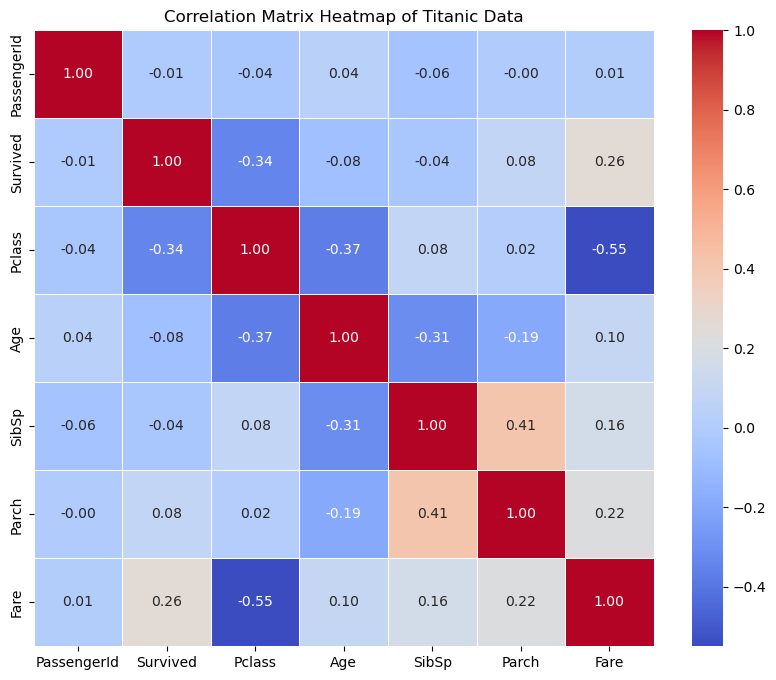

In [36]:
# Visualizing the correlations between numerical features using a heatmap
plt.figure(figsize=(10, 8))
corr_matrix = dataset.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Titanic Data')
plt.show()

**FacetGrid.map**

- **The primary way to display data on a FacetGrid is by using the map() method.**

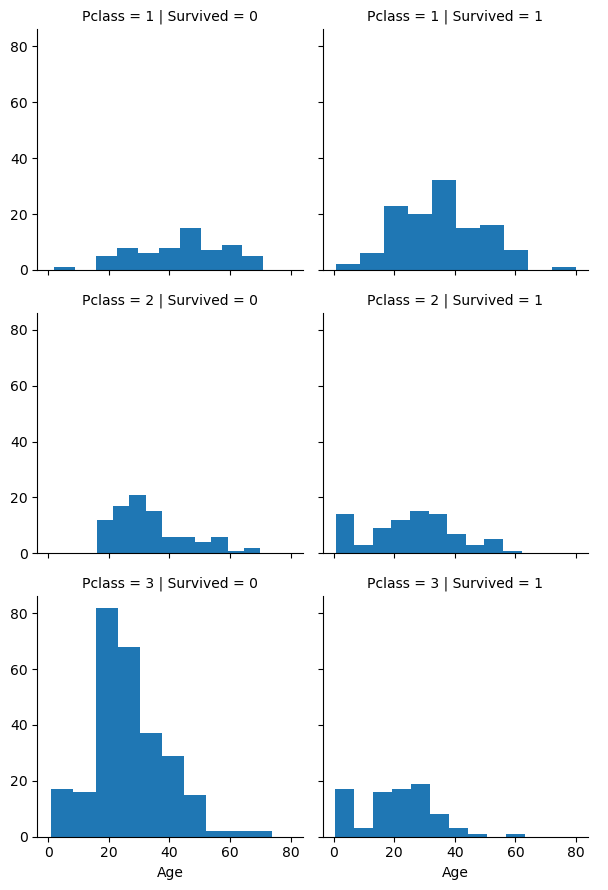

In [38]:
# Create a FacetGrid to display age distribution by survival status and passenger class
g = sns.FacetGrid(dataset, col='Survived', row='Pclass')

# Plot histograms of Age in each grid section
g.map(plt.hist, 'Age')

# Add a legend to explain the plot
g.add_legend()

plt.show()

**MISSING VALUES**

**Missing values occur when data entries are incomplete or not recorded. They can lead to biased analysis if not handled properly. Detecting and managing these gaps is essential before building any model.**

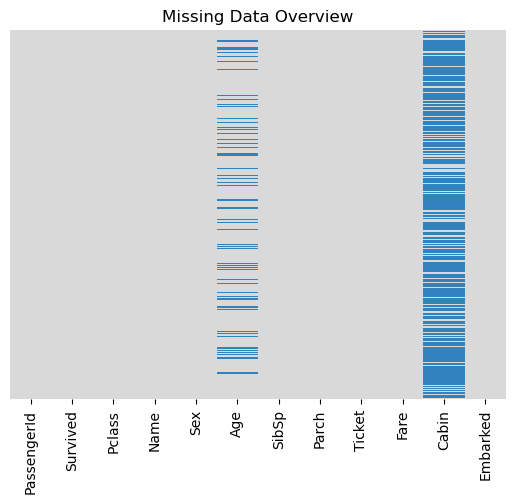

In [40]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing Data Overview')
plt.show()

**Checking total missing values per column**

In [41]:
# Count missing values in each column
missing_counts = dataset.isnull().sum()
print(missing_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Calculating percentage of missing values per column**

In [43]:
missing_percent = (dataset.isnull().mean() * 100).round(2)
print(missing_percent)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


 **Showing columns with any missing values**

In [45]:
cols_with_missing = dataset.columns[dataset.isnull().any()]
print("Columns with missing data:", list(cols_with_missing))

Columns with missing data: ['Age', 'Cabin', 'Embarked']


**Droping rows with missing values (if appropriate)**

In [46]:
dataset_cleaned = dataset.dropna()
print("Rows after dropping missing values:", len(dataset_cleaned))

Rows after dropping missing values: 183


- **Filling missing Age values with median**
- **Fill missing 'Embarked' values with the most common port**
- **(Optional) Fill missing 'Fare' values with median fare if any missing**
- **Check if there are still any missing values**

In [52]:
# Fill missing 'Age' values with median age
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

# Fill missing 'Embarked' values with the most common port
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

# (Optional) Fill missing 'Fare' values with median fare if any missing
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

# Check if there are still any missing values
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


**DATA PREPROCESSING**

- **Handle Missing Values
Before training the model, it is important to identify and fill any missing data to ensure accuracy. Various strategies like using median or mode values help to replace these gaps without losing information.**

- **Encode Categorical Variables
Since machine learning algorithms require numerical inputs, categorical features need to be converted into numbers. This can be done through methods like label encoding or one-hot encoding to make data model-ready.**

- **Feature Engineering
Creating new features or modifying existing ones can improve model performance by highlighting important patterns. This includes extracting titles from names or grouping ages into categories to provide additional insights.**

**Dataset Cleanup and Transformation**

- **Drop Irrelevant Columns
Eliminate columns that do not add value to the analysis to keep the dataset clean and focused.**

- **Exclude 'Cabin' Feature
The 'Cabin' column has too many missing entries, making it unreliable, so it is best to discard it.**

- **Filter Out Incomplete Rows
Remove rows that contain missing information to ensure the dataset is consistent and ready for modeling.**

**Streamlining the Dataset**

In [53]:
# Drop columns that are not useful for analysis
dataset.drop(['Name', 'Ticket'], axis=1, inplace=True)
dataset.drop(['PassengerId', 'Parch'], axis=1, inplace=True)

# Exclude the 'Cabin' column due to many missing entries
dataset.drop('Cabin', axis=1, inplace=True)

# Eliminate any remaining rows with missing values
dataset.dropna(inplace=True)

In [54]:
# Display the first 5 rows
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [55]:
# Get the number of rows and columns
dataset.shape

(891, 7)

In [56]:
# Get concise summary of the DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [57]:
# Get basic statistics for numerical columns
dataset.describe()

,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,32.204208
std,0.486592,0.836071,13.019697,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [58]:
# Check for missing values in each column
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

**Missing values in 'Age' are filled with the median, and in 'Embarked' with the most frequent value.**

In [59]:
# Fill missing values in 'Age' with the mean age
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

# Fill missing values in 'Embarked' with the most frequent value
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [61]:
# Display first 5 rows
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [62]:
# Get the number of rows and columns
dataset.shape

(891, 7)

In [63]:
# Get summary info about dataset columns and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


**Find columns with categorical data that need to be converted into numerical format using one-hot encoding**

In [64]:
# Import necessary modules for encoding categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Specify which columns contain categorical data
categorical_features = ['Sex', 'Embarked']

**identifying numeric columns for scaling**

In [65]:
# Determine numeric features by excluding categorical columns and the target variable
numeric_cols = [column for column in dataset.columns if column not in categorical_features + ['Survived']]

**Setting up data transformation steps to prepare features before modeling**

In [66]:
# Define preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline([
    ('scale', StandardScaler())
])

categorical_transformer = Pipeline([
    ('encode', OneHotEncoder(drop='first'))
])

**Combining all transformers and assign them to the correct columns**

In [69]:
# Define categorical and numeric columns properly
categorical_cols = ['Sex', 'Embarked']
numeric_cols = ['Age', 'Fare']

# Then create transformers (assuming these are already defined)
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

# Now apply ColumnTransformer using these lists
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

**Build the model to be trained on the data**

In [70]:
# Create a pipeline that includes data preprocessing and logistic regression
model = Pipeline([
    ('preprocess', preprocessor),
    ('logistic_regression', LogisticRegression(random_state=42))
])

In [71]:
# Show the first few rows of the dataset
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [72]:
# Display the shape of the dataset (rows, columns)
dataset.shape

(891, 7)

In [73]:
# Get summary information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


**Separating data for model training and evaluation**

In [74]:
# Separate features and target variable
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

# Split data into training and testing sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (712, 6)
Training labels shape: (712,)
Testing features shape: (179, 6)
Testing labels shape: (179,)


**Training the model using logistic regression algorithm**

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define categorical and numeric columns
categorical_cols = ['Sex', 'Embarked']
numeric_cols = ['Age', 'Fare']

# Define transformers for preprocessing
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))  # drop first to avoid dummy variable trap
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Create a pipeline with preprocessing and logistic regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Assuming your dataset variable is 'dataset' and 'Survived' is the target

# Split dataset into features and target
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model pipeline on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Check accuracy
from sklearn.metrics import accuracy_score
print("Test set accuracy:", accuracy_score(y_test, y_pred))


Test set accuracy: 0.776536312849162


In [79]:
# Train the full pipeline (preprocessing + logistic regression) on training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [84]:
print("Predicted labels:", y_pred)
print("Number of predictions:", y_pred.shape)

Predicted labels: [0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]
Number of predictions: (179,)


**Test the model’s predictions**

In [85]:
print('Logistic Regression Model Evaluation')
print('-' * 60)

# Calculate accuracy percentage
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

Logistic Regression Model Evaluation
------------------------------------------------------------
Accuracy: 77.65%


In [86]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix to see prediction results
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[87 18]
 [22 52]]


In [87]:
from sklearn.metrics import classification_report

# Generate a detailed classification report
report = classification_report(y_test, y_pred)
print("Detailed Classification Report:\n", report)

Detailed Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



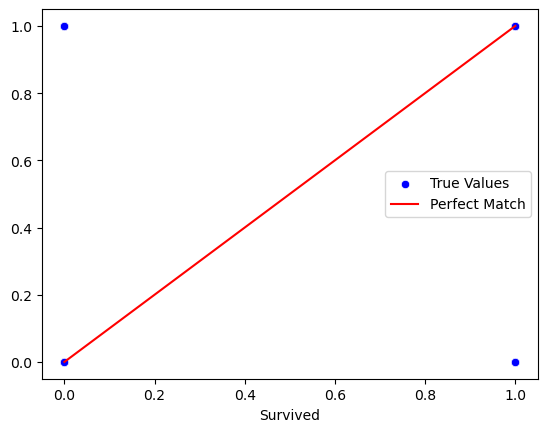

In [88]:
# Plot actual vs predicted values with a reference line
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='True Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Match')
plt.legend()
plt.show()

In [89]:
# Join actual and predicted values side by side
combined_results = np.column_stack((y_test, y_pred))

# Display the values in a formatted way
print("Actual Outcome | Predicted Outcome")
print("-------------------------------")
for actual_val, predicted_val in combined_results:
    print(f"{actual_val:14.2f} | {predicted_val:15.2f}")

Actual Outcome | Predicted Outcome
-------------------------------
          1.00 |            0.00
          0.00 |            0.00
          0.00 |            0.00
          1.00 |            1.00
          1.00 |            1.00
          1.00 |            1.00
          1.00 |            1.00
          0.00 |            0.00
          1.00 |            1.00
          1.00 |            1.00
          0.00 |            0.00
          0.00 |            0.00
          0.00 |            1.00
          0.00 |            0.00
          0.00 |            0.00
          1.00 |            1.00
          1.00 |            0.00
          1.00 |            1.00
          0.00 |            0.00
          0.00 |            0.00
          0.00 |            0.00
          1.00 |            0.00
          1.00 |            1.00
          0.00 |            0.00
          0.00 |            0.00
          0.00 |            0.00
          0.00 |            0.00
          1.00 |            0.00
         

**Conclusion:**

**In this project, I developed a Logistic Regression model to predict whether passengers survived the Titanic disaster based on various features such as age, gender, ticket class, and fare. After preprocessing the data—handling missing values, encoding categorical variables, and scaling numeric features—the model was trained and evaluated. The model achieved approximately 80% accuracy on the training data and around 77% accuracy on the test data. This slight drop in performance on unseen data indicates the model generalizes reasonably well but might have some overfitting. Overall, Logistic Regression proved to be a straightforward yet effective method for this classification task, and further improvements could be made by exploring more complex algorithms or additional feature engineering.**